In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('VOF.L.csv', usecols=[4])
df.head()

,Close
0,326.00
1,331.75
2,342.00
3,352.00
4,350.00


In [3]:
df.shape

(1262, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1262 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [5]:
df.describe()

,Close
count,1262.000000
mean,387.623811
std,74.004481
min,214.000000
25%,331.000000
50%,348.250000
75%,459.375000
max,545.000000


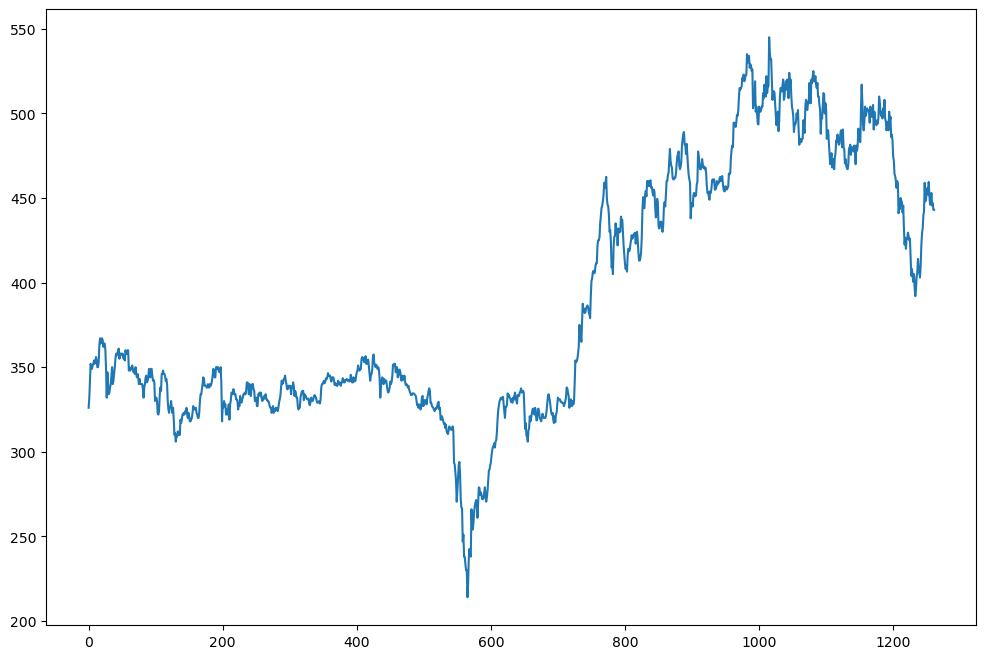

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Close Price History')

In [7]:
train_length = int(len(df)*0.8)
train=df.iloc[:train_length]
test=df.iloc[train_length:]
print(train.shape,test.shape)

(1009, 1) (253, 1)


In [8]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
train_pred=model.predict(X_train)

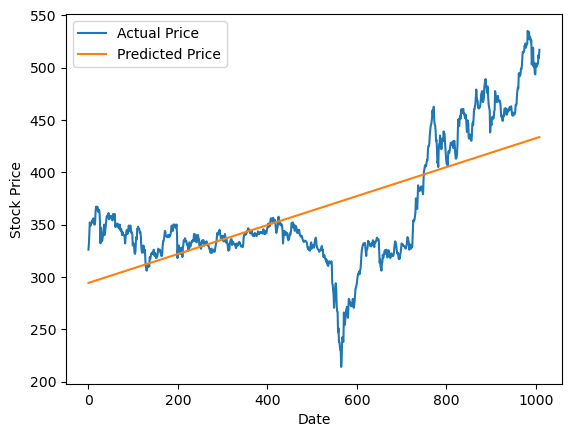

In [11]:
#Train set graph
plt.plot(y_train, label='Actual Price')
plt.plot(X_train, train_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [13]:
test_pred=model.predict(X_test)

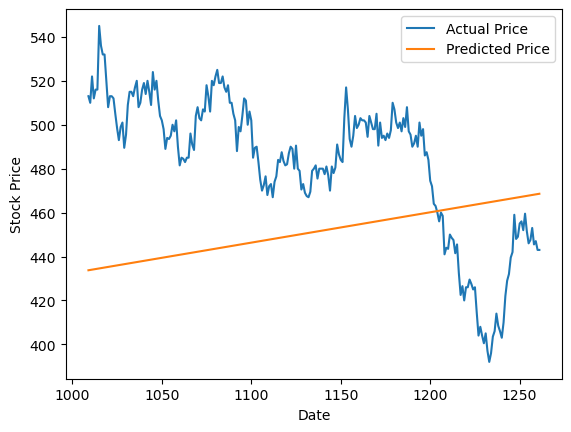

In [14]:
#Test graph
plt.plot(y_test, label='Actual Price')
plt.plot(X_test, test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
print('Test r2 score:', r2_score(y_test, test_pred))
print('Test mean absolute error:', mean_absolute_error(y_test,test_pred))
print('Test mean absolute percentage error:', mean_absolute_percentage_error(y_test,test_pred))
trainScore = math.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test r2 score: -1.5011009286083166
Test mean absolute error: 45.95882123553063
Test mean absolute percentage error: 0.09438975695198373
Train Score: 46.53 RMSE
Test Score: 50.88 RMSE


In [16]:
test_pred

array([433.73872794, 433.87695248, 434.01517703, 434.15340158,
       434.29162612, 434.42985067, 434.56807521, 434.70629976,
       434.84452431, 434.98274885, 435.1209734 , 435.25919795,
       435.39742249, 435.53564704, 435.67387159, 435.81209613,
       435.95032068, 436.08854523, 436.22676977, 436.36499432,
       436.50321886, 436.64144341, 436.77966796, 436.9178925 ,
       437.05611705, 437.1943416 , 437.33256614, 437.47079069,
       437.60901524, 437.74723978, 437.88546433, 438.02368887,
       438.16191342, 438.30013797, 438.43836251, 438.57658706,
       438.71481161, 438.85303615, 438.9912607 , 439.12948525,
       439.26770979, 439.40593434, 439.54415888, 439.68238343,
       439.82060798, 439.95883252, 440.09705707, 440.23528162,
       440.37350616, 440.51173071, 440.64995526, 440.7881798 ,
       440.92640435, 441.0646289 , 441.20285344, 441.34107799,
       441.47930253, 441.61752708, 441.75575163, 441.89397617,
       442.03220072, 442.17042527, 442.30864981, 442.44